# Machine Learning Project Code

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [39]:
# Read the csv file
students = pd.read_csv("data.csv", delimiter=";")

In [3]:
# Display the head
students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# Display the shape
students.shape

(4424, 37)

In [5]:
# Brief information about the data
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [40]:
# Properly formating the column names
students.columns = students.columns.str.lower().str.strip().str.replace(' ', '_')

In [41]:
# Counting the values of each unique target 
students['target'].value_counts()

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [8]:
# Removing every student who's enrolled
students = students[students['target'] != 'Enrolled']

In [9]:
# Define a mapping dictionary
target_mapping = {
    'Graduate': 0,
    'Dropout': 1,
}

# Apply the mapping to the target column
students['target'] = students['target'].map(target_mapping)

In [11]:
# Defining the features and target
features = students.drop(columns = ["target"])
target = students["target"]

In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

# KNN
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

# Evaluating KNN model
knn.score(X_test, y_test)

0.7520661157024794

In [14]:
# Decision Tree
tree = DecisionTreeClassifier(max_depth=10)

tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8677685950413223
Precision: 0.8703703703703703
Recall: 0.793918918918919
F1 Score: 0.8303886925795052


In [16]:
# Bagging and Pasting
bagging_class = BaggingClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=100, max_samples = 1000)
bagging_class.fit(X_train, y_train)
y_pred_bagging = bagging_class.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_bagging)
precision = precision_score(y_test, y_pred_bagging)
recall = recall_score(y_test, y_pred_bagging)
f1 = f1_score(y_test, y_pred_bagging)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9022038567493113
Precision: 0.9343629343629344
Recall: 0.8175675675675675
F1 Score: 0.8720720720720722


In [17]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, max_samples=1000)

random_forest.fit(X_train, y_train)

y_pred_forest = random_forest.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_forest)
precision = precision_score(y_test, y_pred_forest)
recall = recall_score(y_test, y_pred_forest)
f1 = f1_score(y_test, y_pred_forest)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9077134986225895
Precision: 0.9420849420849421
Recall: 0.8243243243243243
F1 Score: 0.8792792792792792


In [19]:
# Gradient Boosting
gradient_boosting = GradientBoostingClassifier(n_estimators=100, max_depth=10, subsample=0.8)

gradient_boosting.fit(X_train, y_train)

y_pred_boosting = gradient_boosting.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_boosting)
precision = precision_score(y_test, y_pred_boosting)
recall = recall_score(y_test, y_pred_boosting)
f1 = f1_score(y_test, y_pred_boosting)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9035812672176309
Precision: 0.928030303030303
Recall: 0.8277027027027027
F1 Score: 0.875


In [20]:
# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)

# Train the classifier
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = adaboost.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada)
recall = recall_score(y_test, y_pred_ada)
f1 = f1_score(y_test, y_pred_ada)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9035812672176309
Precision: 0.924812030075188
Recall: 0.831081081081081
F1 Score: 0.8754448398576512


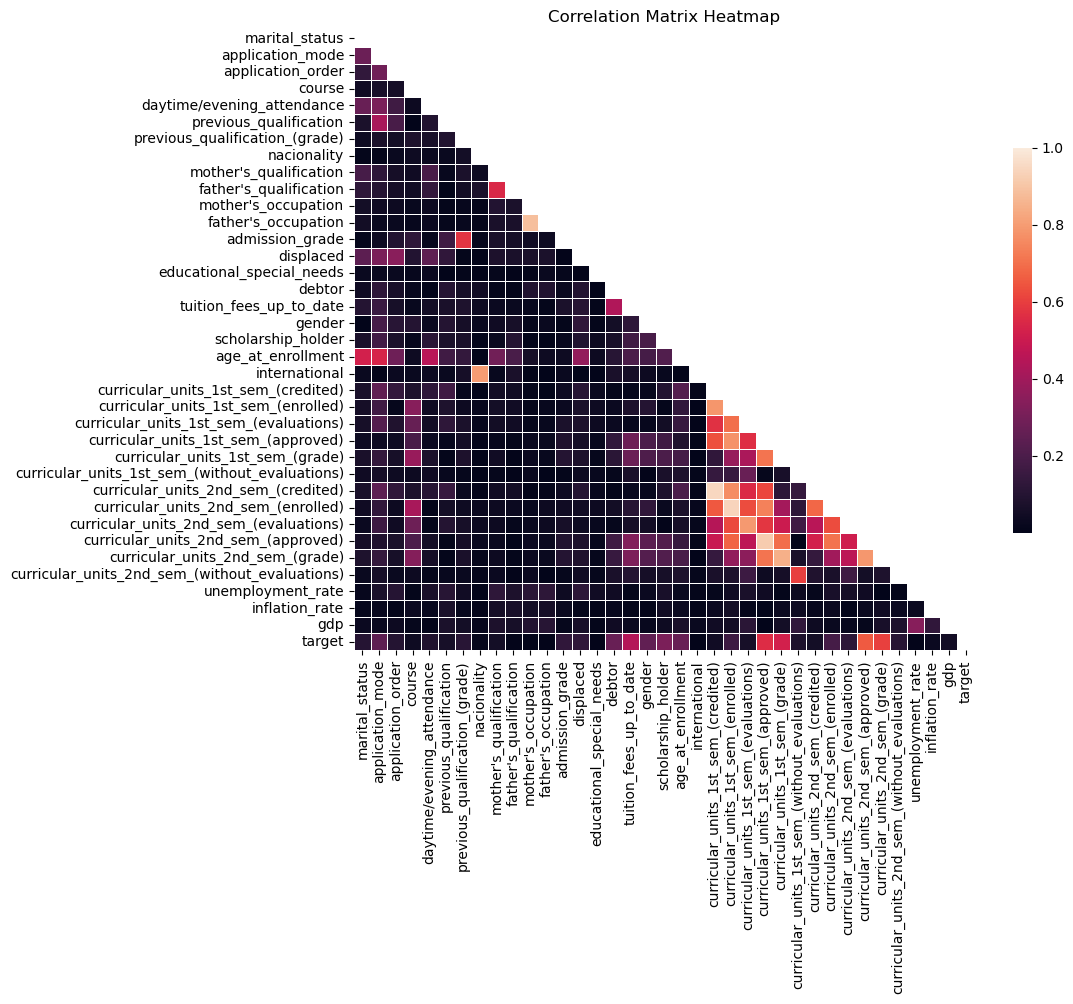

In [21]:
corr = np.abs(students.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.title('Correlation Matrix Heatmap')
plt.show()

# From this point forward the data is modified and tested for improvement.

In [22]:
# Columns droped because of high corralation with other variables, not the target
drop_col = ['curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)', 
            "father's_occupation"]

students_2 = students.drop(columns=drop_col)

# Select numerical columns for scaling
numerical_columns = students_2.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = MinMaxScaler()

# Exclude the target column from numerical columns
numerical_columns = numerical_columns.drop('target')

# Scale the numerical columns
students_2[numerical_columns] = scaler.fit_transform(students_2[numerical_columns])

# Defining the features and target
features_2 = students_2.drop(columns = ["target"])
target_2 = students_2["target"]

students_2.head()

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,father's_qualification,...,curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target
0,0.0,0.285714,0.833333,0.013858,1.0,0.0,0.284211,0.0,0.418605,0.255814,...,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,1
1,0.0,0.250000,0.166667,0.925989,1.0,0.0,0.684211,0.0,0.000000,0.046512,...,0.0,0.26087,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,0
2,0.0,0.000000,0.833333,0.907512,1.0,0.0,0.284211,0.0,0.837209,0.837209,...,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,1
3,0.0,0.285714,0.333333,0.978108,1.0,0.0,0.284211,0.0,0.860465,0.837209,...,0.0,0.26087,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,0
4,0.2,0.678571,0.166667,0.801466,0.0,0.0,0.052632,0.0,0.837209,0.860465,...,0.0,0.26087,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,0


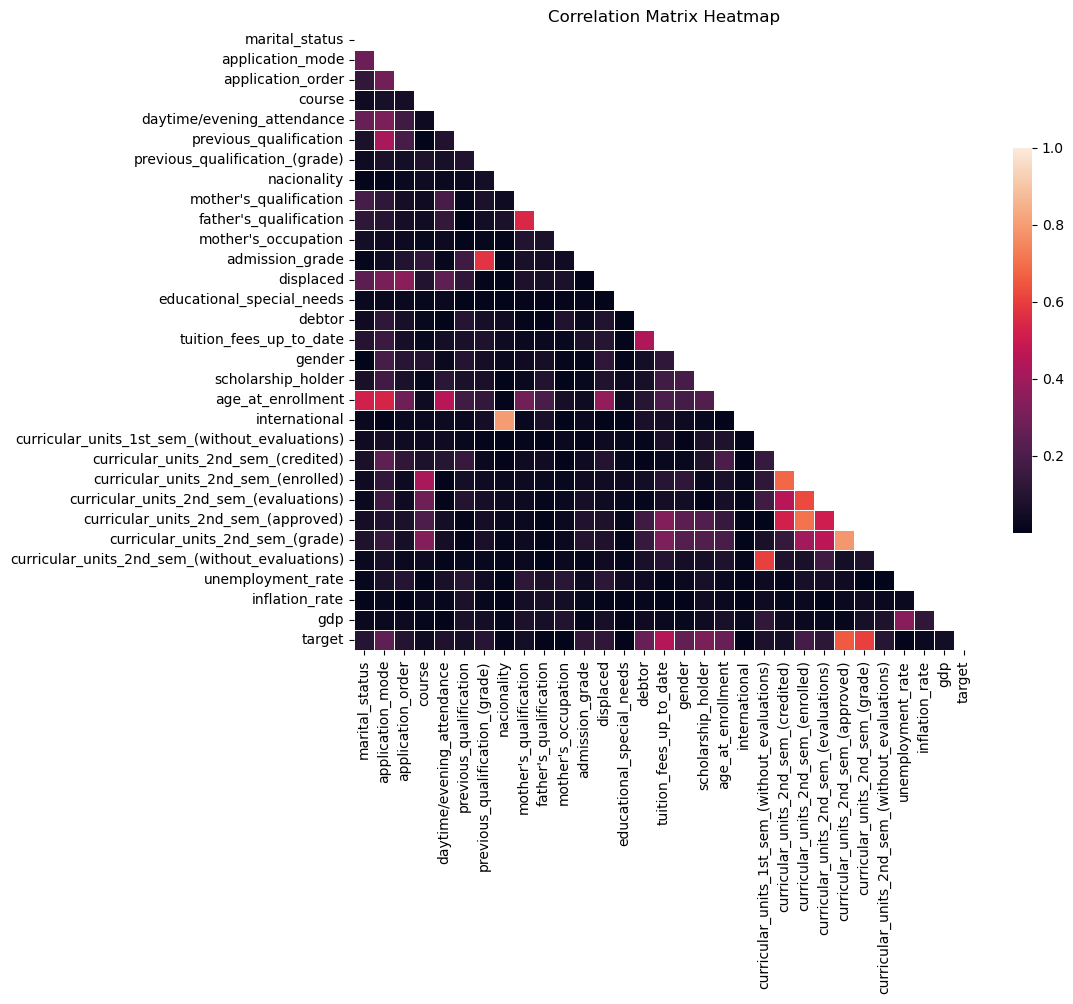

In [23]:
corr = np.abs(students_2.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [24]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features_2, target_2, test_size=0.20, random_state=0)

# KNN
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, y_train)

# Evaluating KNN model
knn.score(X_test, y_test)

0.8305785123966942

In [25]:
# Decision Tree
tree = DecisionTreeClassifier(max_depth=5)

tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8787878787878788
Precision: 0.8969465648854962
Recall: 0.793918918918919
F1 Score: 0.8422939068100359


In [26]:
# Bagging and Pasting
bagging_class = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100, max_samples = 1000)
bagging_class.fit(X_train, y_train)
y_pred_bagging = bagging_class.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_bagging)
precision = precision_score(y_test, y_pred_bagging)
recall = recall_score(y_test, y_pred_bagging)
f1 = f1_score(y_test, y_pred_bagging)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8911845730027548
Precision: 0.9288537549407114
Recall: 0.793918918918919
F1 Score: 0.8561020036429873


In [26]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, max_samples=1000)

random_forest.fit(X_train, y_train)

y_pred_forest = random_forest.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_forest)
precision = precision_score(y_test, y_pred_forest)
recall = recall_score(y_test, y_pred_forest)
f1 = f1_score(y_test, y_pred_forest)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7491525423728813
Precision: 0.7404783418318055
Recall: 0.7491525423728813
F1 Score: 0.7335562297257583


In [27]:
# Gradient Boosting
gradient_boosting = GradientBoostingClassifier(n_estimators=100, max_depth=5, subsample=0.8)

gradient_boosting.fit(X_train, y_train)

y_pred_boosting = gradient_boosting.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_boosting)
precision = precision_score(y_test, y_pred_boosting)
recall = recall_score(y_test, y_pred_boosting)
f1 = f1_score(y_test, y_pred_boosting)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8953168044077136
Precision: 0.9074074074074074
Recall: 0.8277027027027027
F1 Score: 0.8657243816254417


In [28]:
# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)

# Train the classifier
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = adaboost.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada)
recall = recall_score(y_test, y_pred_ada)
f1 = f1_score(y_test, y_pred_ada)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8842975206611571
Precision: 0.8925925925925926
Recall: 0.8141891891891891
F1 Score: 0.8515901060070671


In [83]:
# Define the model
gbc = GradientBoostingClassifier() 

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.1, 0.5, 1.0],
    'subsample': [0.8, 1.0]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print("Best parameters from Grid Search:", best_params)

# Train the model with the best parameters
best_gbc = grid_search.best_estimator_
best_gbc.fit(X_train, y_train)

Best parameters from Grid Search: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


GradientBoostingClassifier(max_depth=5, n_estimators=200, subsample=0.8)

# Additional Models

In [41]:
!pip install xgboost
!pip install lightgbm
!pip install catboost
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# XGBoost
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# LightGBM
lgbm_model = LGBMClassifier(random_state=0)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))

# CatBoost
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_catboost))


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:35
   ---------------------------------------- 0.1/99.8 MB 901.1 kB/s eta 0:01:51
   ---------------------------------------- 0.2/99.8 MB 958.1 kB/s eta 0:01:44
   ---------------------------------------- 0.3/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.3/99.8 MB 1.4 MB/s eta 0:01:09
   ---------------------------------------- 0.6/99.8 MB 2.2 MB/s eta 0:00:47
   ---------------------------------------- 0.8/99.8 MB 2.4 MB/s eta 0:00:41
   ---------------------------------------- 1.1/99.8 MB 3.0 MB/s eta 0:00:33
    --------------------------------------- 1.4/99.8 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 1.7/99.8 MB 3.7 MB/s eta 0:00:27
    --------------------------------------- 2.0/99.8 MB 4.1 MB/s eta 0:00:24
  

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 2.0 MB/s eta 0:00:01
   --- ------------------------------------ 0.1/1.3 MB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 0.1/1.3 MB 1.2 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.3 MB 1.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.3 MB 1.7 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.3 MB 2.2 MB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 2.7 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.3 MB 2.8 MB/s eta 0:00:01
   ------------------------------------- -- 1.2/1.3 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   --------------------------

XGBoost Accuracy: 0.7864406779661017
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 3539, number of used features: 30
[LightGBM] [Info] Start training from score -0.699099
[LightGBM] [Info] Start training from score -1.135451
[LightGBM] [Info] Start training from score -1.705455
LightGBM Accuracy: 0.792090395480226
CatBoost Accuracy: 0.7966101694915254


# Predicting the outcome of the enrolled students

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read the csv file
students = pd.read_csv("data.csv", delimiter=";")

# Properly formatting the column names
students.columns = students.columns.str.lower().str.strip().str.replace(' ', '_')

# Define a mapping dictionary
target_mapping = {'Graduate': 0, 'Dropout': 1, 'Enrolled': 2}

# Apply the mapping to the target column
students['target'] = students['target'].map(target_mapping)

# Data with only enrolled students
enrolled_students = students[students['target'] == 2]

# Data without the enrolled students
not_enrolled_students = students[students['target'] != 2]

# Select features
features = not_enrolled_students.drop(columns=['target'])
target = not_enrolled_students['target']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

#Random Forest
random_forest = RandomForestClassifier(n_estimators=200, max_depth=5, max_samples=1000)

random_forest.fit(X_train, y_train)

y_pred_forest = random_forest.predict(X_test)

# Select features for enrolled students
features_enrolled = enrolled_students.drop(columns=['target'])

# Use the trained model to make predictions
predictions_enrolled = random_forest.predict(features_enrolled)

# Add the predictions to the enrolled students DataFrame
enrolled_students['predictions'] = predictions_enrolled

# Reverse the target mapping for easier interpretation
reverse_mapping = {v: k for k, v in target_mapping.items()}
enrolled_students['predictions'] = enrolled_students['predictions'].map(reverse_mapping)

# Calculate the percentage of predicted outcomes
prediction_counts = enrolled_students['predictions'].value_counts(normalize=True) * 100
graduation_percentage = prediction_counts.get('Graduate', 0)
dropout_percentage = prediction_counts.get('Dropout', 0)

# The amount of students predicted to either dropout or graduate
print(enrolled_students['predictions'].value_counts())
print('-----------------------------------------------------')
print(f"Percentage of students predicted to Graduate: {graduation_percentage:.2f}%")
print(f"Percentage of students predicted to Dropout: {dropout_percentage:.2f}%")

predictions
Graduate    458
Dropout     336
Name: count, dtype: int64
-----------------------------------------------------
Percentage of students predicted to Graduate: 57.68%
Percentage of students predicted to Dropout: 42.32%


C:\Users\ricar\AppData\Local\Temp\ipykernel_14356\4113235864.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrolled_students['predictions'] = predictions_enrolled
C:\Users\ricar\AppData\Local\Temp\ipykernel_14356\4113235864.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrolled_students['predictions'] = enrolled_students['predictions'].map(reverse_mapping)
